In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('Datasets\Titanic_train.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data=train_data.drop(columns='Cabin')
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [8]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

([<matplotlib.axis.XTick at 0x1c91143ffd0>,
 [Text(0, 0, 'not Survived'), Text(1, 0, 'Survived')])

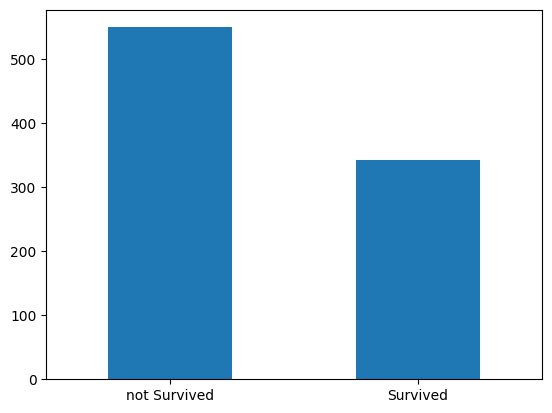

In [9]:
c_c=pd.value_counts(train_data['Survived'],sort=True)
c_c.plot(kind='bar',rot=0)
plt.xticks(range(2),["not Survived","Survived"])

In [10]:
# male:0 and female:1
# emabrked s:0 c:1 q:2
train_data.replace({'Sex':{'male': 0,'female':1},'Embarked':{'S': 0,'C':1,'Q':2}},inplace=True)


In [11]:
X=train_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [12]:
Y=train_data['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [14]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [15]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression()
LRmodel.fit(x_train,y_train)

LogisticRegression()

In [16]:
prediction=LRmodel.predict(x_test)
prediction[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [17]:
y_test[0:5]

707    1
37     0
615    1
169    0
68     1
Name: Survived, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

# Assuming prediction_probabilities is an array of probabilities
threshold = 0.5  # Adjust as needed
binary_predictions = np.where(prediction > threshold, 1, 0)

# Now use binary_predictions instead of prediction for computing metrics
acc_score = accuracy_score(binary_predictions, y_test)
c_m = confusion_matrix(binary_predictions, y_test)
c_r = classification_report(binary_predictions, y_test)

print(acc_score)
print(c_m)
print(c_r)

0.7821229050279329
[[91 30]
 [ 9 49]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       121
           1       0.62      0.84      0.72        58

    accuracy                           0.78       179
   macro avg       0.77      0.80      0.77       179
weighted avg       0.82      0.78      0.79       179



In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

# Assuming prediction_probabilities is an array of probabilities
threshold = 0.5  # Adjust as needed
binary_predictions = np.where(prediction > threshold, 1, 0)

# Now use binary_predictions instead of prediction for computing metrics
acc_score = accuracy_score(binary_predictions, y_test)
c_m = confusion_matrix(binary_predictions, y_test)
c_r = classification_report(binary_predictions, y_test)

print(acc_score)
print(c_m)
print(c_r)

0.7821229050279329
[[91 30]
 [ 9 49]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       121
           1       0.62      0.84      0.72        58

    accuracy                           0.78       179
   macro avg       0.77      0.80      0.77       179
weighted avg       0.82      0.78      0.79       179



In [20]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(LRmodel, file)